In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [79]:
rho_main = np.loadtxt('rho_dua_dimensi_cartesian_data_tanpa_mp.csv', delimiter=',')
rho_main.shape

(130321, 400)

In [80]:
rho_main = rho_main.reshape(len(rho_main), 20, 20)
rho_main.shape

(130321, 20, 20)

In [81]:
plot_x = np.arange(20)
plot_y = np.arange(0,20)
PLOT_X, PLOT_Y = np.meshgrid(plot_x, plot_y)

index1= 28102
index2= 102571


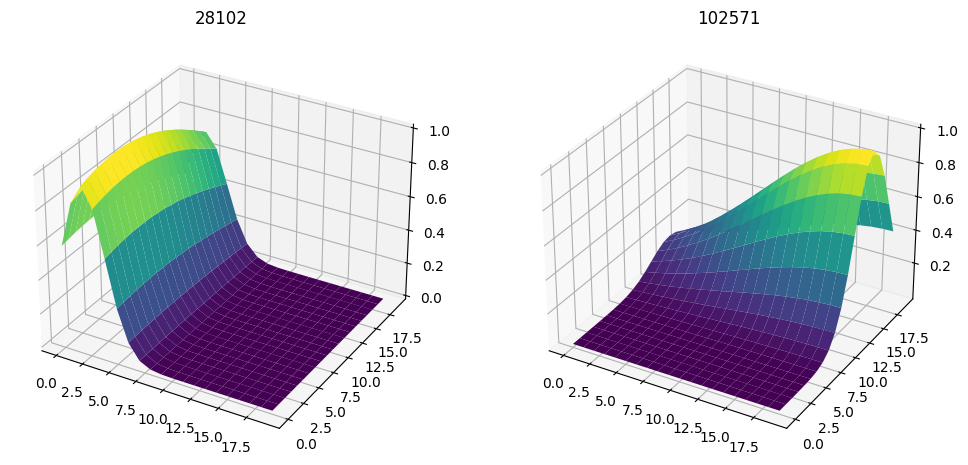

In [107]:
index1 = random.randint(0, len(rho_main))
index2 = random.randint(0, len(rho_main))

rho_1 = rho_main[index1]
print('index1=', index1)
rho_2 = rho_main[index2]
print('index2=', index2)

plot_x = np.arange(20)
plot_y = np.arange(0,20)
PLOT_X, PLOT_Y = np.meshgrid(plot_x, plot_y)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(PLOT_X, PLOT_Y, rho_1, cmap='viridis')
ax1.set_title('rho index:', index1)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(PLOT_X, PLOT_Y, rho_2, cmap='viridis')
ax2.set_title('rho index:', index2)

plt.show()

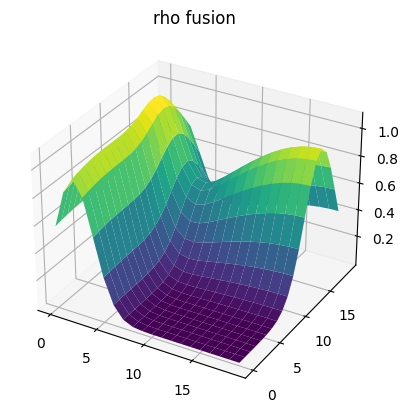

In [122]:
rho_fusion = rho_main[28102] + rho_main[102571]

fig_fusion = plt.figure()
ax = fig_fusion.add_subplot(111, projection='3d')
ax.plot_surface(PLOT_X, PLOT_Y, rho_fusion, cmap='viridis')
ax.set_title('rho fusion')

plt.show()

In [132]:
np.max(rho_fusion)

1.09224415071

In [123]:
np.savetxt('rho_dua_puncak.csv', rho_fusion, fmt='%.15f', delimiter=',')

In [124]:
# gauss - seidel
iterasi = 100
jumlah_x = 20
jumlah_y = 20
jumlah_titik = jumlah_x*jumlah_y

delta_x = 0.5
delta_y = 0.5
jumlah_iterasi = 100
epsilon_nol = 1

iterasi = np.arange(0,jumlah_iterasi)
temp = np.zeros((jumlah_y,jumlah_x))
phi = np.zeros((jumlah_y,jumlah_x))

for h in (iterasi):
        for j in range (1, jumlah_y-1):
            for i in range (1, jumlah_x-1):
                    phi[j,i] = ((((temp[j, i+1]+temp[j, i-1])/delta_x**2)+((temp[j+1, i]+temp[j-1, i])/delta_y**2)+(rho_fusion[j,i]/epsilon_nol))/2)\
                        *(delta_x**2 * delta_y**2)/(delta_y**2 + delta_x**2)
                    temp[j,i] = phi[j,i]

np.savetxt('phi_fusion_2D_GS.csv', phi, delimiter=',')

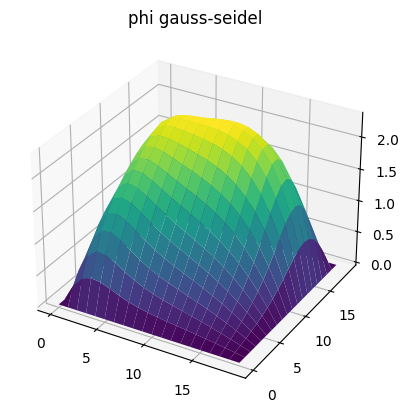

In [125]:
fig_phi = plt.figure()
ax_phi = fig_phi.add_subplot(111, projection='3d')
ax_phi.plot_surface(PLOT_X, PLOT_Y, phi, cmap='viridis')
ax_phi.set_title('phi gauss-seidel')

plt.show()

In [131]:
b=np.array([2,4,6,8,10])
b=b/np.max(b)
b

array([0.2, 0.4, 0.6, 0.8, 1. ])